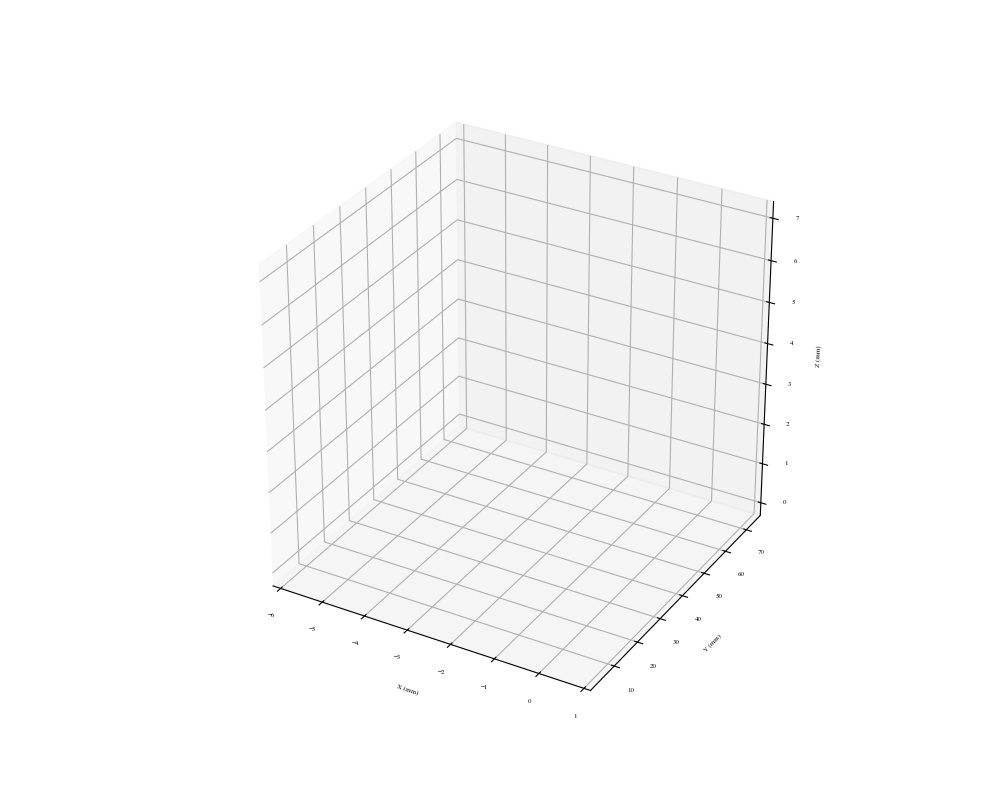

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 28 21:12:47 2025

@author: mrsag
"""


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

import matplotlib as mpl


mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
#mpl.rcParams['font.weight'] = 'bold'
#mpl.rcParams['font.style'] = 'italic'  # Set this to 'italic'
mpl.rcParams['figure.dpi']=100 # highres display

# %%

# Defining constants:
cm = 1e-2
mm = 1e-3
qe = -1.6e-19
me = 9.11e-31
keV_to_Joule = 1.6e-16
qp = -1*qe
mH = 1836*me

# %%

# Input parameters:
    
Ex = 12000    # in V/m
Ey = 10000    # in V/m
Ez = 0    # in V/m

Bx = 1  # in Tesla
By = 1  # in Tesla
Bz = 0  # in Tesla

vx0,vy0,vz0 = 1,1,1
mod_v = np.sqrt(vx0**2+vy0**2+vz0**2)
vx0, vy0, vz0 = np.array([vx0, vy0, vz0]) / mod_v

# %%

class particle():
    def __init__(self,vx,vy,vz,q,m):
        self.x = 0
        self.y = 0
        self.z = 0
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.q = q
        self.m = m
        self.v = np.sqrt(vx**2+vy**2+vz**2)
        self.Energy = m*self.v**2/2
        self.pos = [[],[],[]]
    

    def propagator(self):
        global t
        global dt
        global B_field
        global E_field
        global Ex
        global Ey
        global Ez
        global Bx

        for i in range(len(t)):
            Fx = self.q*(Ex+(self.vy*Bz-self.vz*By))
            Fy = self.q*(Ey+(self.vz*Bx-self.vx*Bz))
            Fz = self.q*(Ez+(self.vx*By-self.vy*Bz))

            ax,ay,az = Fx/self.m, Fy/self.m, Fz/self.m

            self.x += self.vx*dt + ax*dt**2/2
            self.y += self.vy*dt + ay*dt**2/2
            self.z += self.vz*dt + az*dt**2/2

            self.vx += ax*dt
            self.vy += ay*dt
            self.vz += az*dt


            self.v = np.sqrt(self.vx**2+self.vy**2+self.vz**2)
            self.E = self.m*self.v**2/2
            
            self.pos[0].append(self.x)
            self.pos[1].append(self.y)
            self.pos[2].append(self.z)
            
        return np.array(self.pos)
    
# %%

class electron(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=qe, m=me)

class proton(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=qp, m=mH)

class C1(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=1*qp, m=12*mH)

class C2(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=2*qp, m=12*mH)

class C3(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=3*qp, m=12*mH)

class C4(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=4*qp, m=12*mH)

class C5(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=5*qp, m=12*mH)

class C6(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=6*qp, m=12*mH)

class O1(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=1*qp, m=16*mH)

class O2(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=2*qp, m=16*mH)

class O3(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=3*qp, m=16*mH)

class O4(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=4*qp, m=16*mH)

class O5(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=5*qp, m=16*mH)

class O6(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=6*qp, m=16*mH)

class O7(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=7*qp, m=16*mH)

class O8(particle):
    def __init__(self, vx, vy, vz):
        super().__init__(vx, vy, vz, q=8*qp, m=16*mH)

        
# %%

E = 1*keV_to_Joule
m = mH
v = np.sqrt(2*E/m)
vx = vx0*v
vy = vy0*v
vz = vz0*v
p = proton(vx=vx, vy=vy, vz=vz)
t_max = 5*cm/v
time_resolution = 10000
t = np.linspace(0,t_max,time_resolution)
dt = np.diff(t)[0]
num_steps = len(t)

# %%

pos = p.propagator()
pos = pos/mm

xs = pos[0]
ys = pos[1]
zs = pos[2]

# Plot setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set tight limits
ax.set_xlim(np.min(xs), np.max(xs))
ax.set_ylim(np.min(ys), np.max(ys))
ax.set_zlim(np.min(zs), np.max(zs))


# Set equal box aspect
ax.set_box_aspect([1, 1, 1])

# Set axis labels
ax.set_xlabel('X (mm)', fontsize=5)
ax.set_ylabel('Y (mm)', fontsize=5)
ax.set_zlabel('Z (mm)', fontsize=5)

# Make ticks smaller
ax.tick_params(axis='both', which='major', labelsize=5)
ax.tick_params(axis='both', which='minor', labelsize=3)


# Initialize line
line, = ax.plot([], [], [], lw=0.5, color='blue')

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def update(num):
    line.set_data(xs[:num], ys[:num])
    line.set_3d_properties(zs[:num])
    return line,

ani = FuncAnimation(fig, update, frames=num_steps, init_func=init,
                    interval=0.1, blit=True)

plt.show()
